# Sentiment-based Product Recommendation System

### Build a sentiment-based product recommendation system, which includes the following tasks.

- Data sourcing and sentiment analysis
- Building a recommendation system
- Improving the recommendations using the sentiment analysis model
- Deploying the end-to-end project with a user interface

## Data sourcing and sentiment analysis

### 1. Exploratory data analysis

### 2. Data cleaning

### 3. Text preprocessing

### 4. Feature extraction

### 5. Model training & Evaluation

### Load required libraries and load the data

In [85]:
#Import the required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [86]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:

!ls "/content/drive/My Drive/Capstone"


sample30.csv  user_final_rating_scaled.pkl  xgb_model.pkl


In [88]:
reviews = pd.read_csv("/content/drive/My Drive/Capstone/sample30.csv")

In [89]:
reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [90]:
reviews.shape

(30000, 15)

In [91]:
## Lets check the percentage of null values across the columns
round(100*reviews.isnull().mean(),2).reset_index()

,index,0
0,id,0.00
1,brand,0.00
2,categories,0.00
3,manufacturer,0.47
4,name,0.00
5,reviews_date,0.15
6,reviews_didPurchase,46.89
7,reviews_doRecommend,8.57
8,reviews_rating,0.00
9,reviews_text,0.00


In [92]:
#check the data types of different columns
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

## <p style="color: green;">1. Exploratory Data Analysis</p>

### Review Ratings Distribution

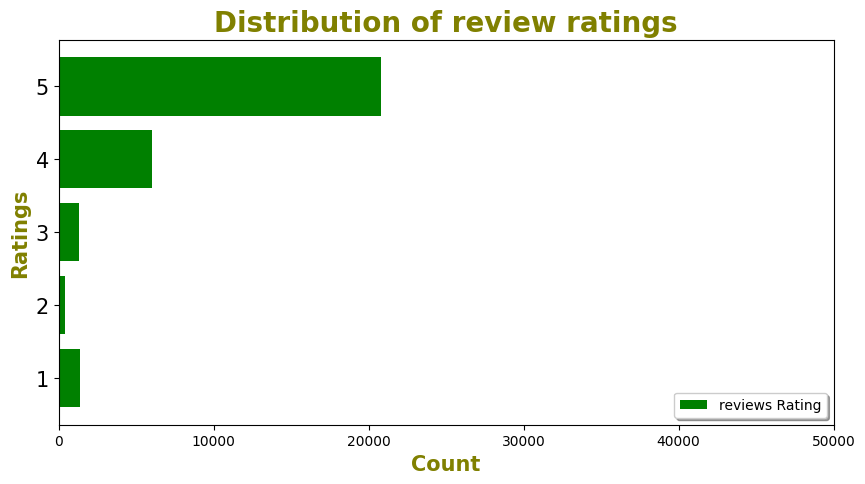

In [13]:
#plot ratings distribution
plt.figure(figsize=[10,5]) #[width, height]
x = list(reviews['reviews_rating'].value_counts().index)
y = list(reviews['reviews_rating'].value_counts())
plt.barh(x, y, color = 'green')

ticks_x = np.linspace(0, 50000, 6) # (start, end, no of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks(size=15)

plt.title('Distribution of review ratings', fontsize=20, weight='bold', color='olive', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='olive')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='olive')
plt.legend(['reviews Rating'], shadow=True, loc=4)

### Lets check if the reviews come from shoppers who actually bought the products

In [93]:
#on the reviews.didpurchase column, replace NaN filds with "Unknown"
reviews['reviews_didPurchase'].fillna("Unknown", inplace=True)

In [94]:
reviews['reviews_didPurchase'] = reviews['reviews_didPurchase'].astype(str)

In [95]:
reviews['reviews_didPurchase'].value_counts()

,count
reviews_didPurchase,
False,14498
Unknown,14068
True,1434


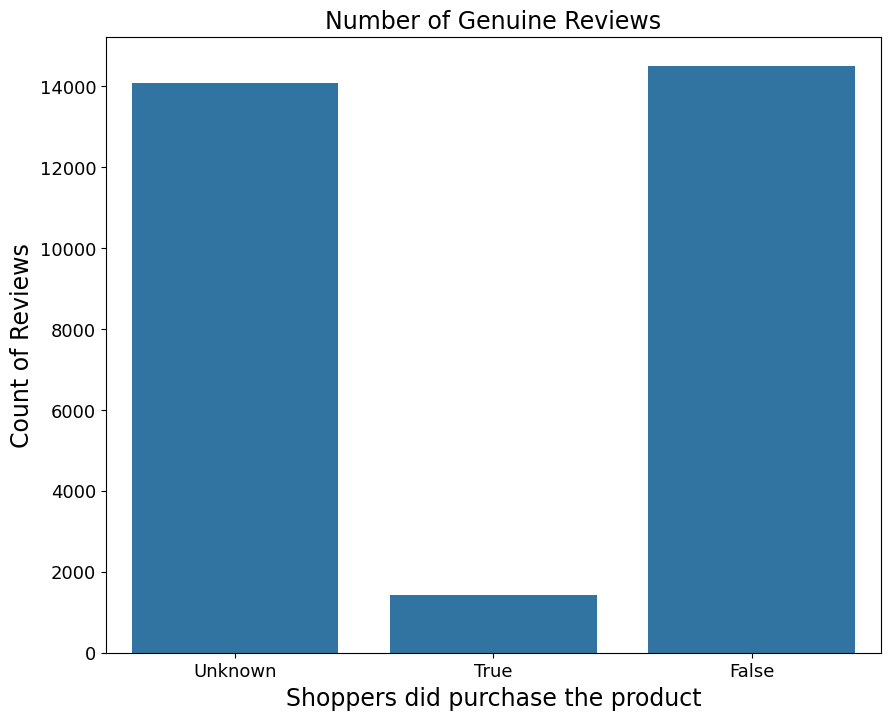

In [96]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x=reviews['reviews_didPurchase'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)

In [97]:
#Shoppers who did purchase the product and provided a review

print(f"Only {(reviews[reviews.reviews_didPurchase=='True'].id.count()/reviews.reviews_didPurchase.count())*100}% of users who reviewed the product did actually purchase the product")

Only 4.78% of users who reviewed the product did actually purchase the product


### How have the users rated products that they recommend

In [98]:
#on the reviews_doRecommend column, replace NaN filds with "Unknown"
reviews['reviews_doRecommend'].fillna("Unknown", inplace=True)

In [99]:
reviews['reviews_doRecommend'] = reviews['reviews_doRecommend'].astype(str)

In [100]:
reviews['reviews_doRecommend'].value_counts()

,count
reviews_doRecommend,
True,25880
Unknown,2570
False,1550


<Axes: xlabel='reviews_doRecommend', ylabel='count'>

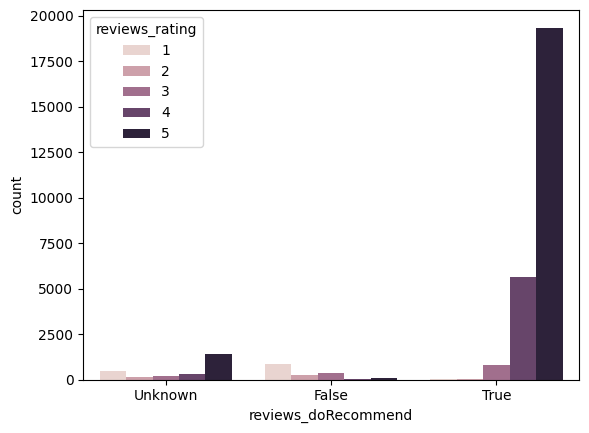

In [101]:
# Lets assess the ratings as compared to reviews_doRecommend
sns.countplot(reviews, x='reviews_doRecommend', hue='reviews_rating')

In [102]:
#What percentage of users who recommended the product have given a rating > 2
print(f"{(reviews[(reviews.reviews_doRecommend == 'True') & (reviews.reviews_rating > 2)].id.count() / reviews[reviews.reviews_doRecommend == 'True'].id.count()) * 100:.2f}% of users who recommend the product have given a rating higher than 2")

99.62% of users who recommend the product have given a rating higher than 2


In [103]:
#What percentage of users whose recommendation is unknown have given a rating > 2
print(f"{(reviews[(reviews.reviews_doRecommend == 'Unknown') & (reviews.reviews_rating > 2)].id.count() / reviews[reviews.reviews_doRecommend == 'Unknown'].id.count()) * 100:.2f}% of users whose recommendation is unknown have given a rating higher than 2")

75.72% of users whose recommendation is unknown have given a rating higher than 2


#### For these users, who have given the rating > 2 , we can consider that they would recommend the product

In [104]:
# Lets update these unknown values to True for the ~76% reviews
reviews.loc[(reviews.reviews_doRecommend == 'Unknown') & (reviews.reviews_rating > 2), 'reviews_doRecommend'] = "True"

In [105]:
# Lets update these unknown values to False for the remaining reviews
reviews.loc[(reviews.reviews_doRecommend == 'Unknown') & (reviews.reviews_rating <= 2), 'reviews_doRecommend'] = "False"

In [106]:
reviews['reviews_doRecommend'].value_counts()

,count
reviews_doRecommend,
True,27826
False,2174


<Axes: xlabel='reviews_doRecommend', ylabel='count'>

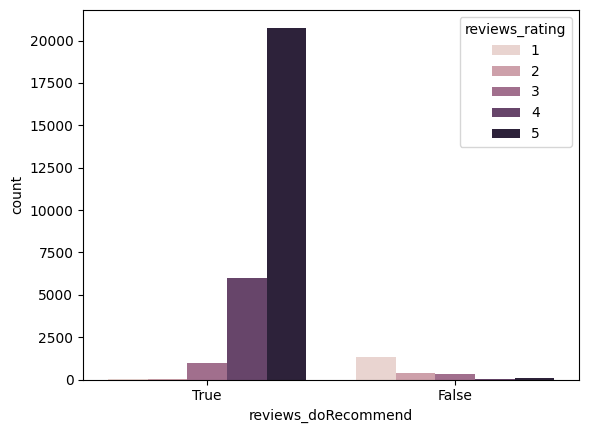

In [107]:
# Lets assess the ratings as compared to reviews_doRecommend
sns.countplot(reviews, x='reviews_doRecommend', hue='reviews_rating')

## <p style="color: green;">2. Data Cleaning</p>

In [108]:
## Lets check the percentage of null values across the columns
round(100*reviews.isnull().mean(),2).reset_index()

,index,0
0,id,0.00
1,brand,0.00
2,categories,0.00
3,manufacturer,0.47
4,name,0.00
5,reviews_date,0.15
6,reviews_didPurchase,0.00
7,reviews_doRecommend,0.00
8,reviews_rating,0.00
9,reviews_text,0.00


In [109]:
#There are a lot of null values in the columns reviews_userCity and reviews_userProvince, so we drop them

reviews_copy = reviews.copy()

reviews = reviews.drop(['reviews_userCity','reviews_userProvince'],axis = 1)

In [110]:
## Lets check the percentage of null values across the columns
round(100*reviews.isnull().mean(),2).reset_index()

,index,0
0,id,0.00
1,brand,0.00
2,categories,0.00
3,manufacturer,0.47
4,name,0.00
5,reviews_date,0.15
6,reviews_didPurchase,0.00
7,reviews_doRecommend,0.00
8,reviews_rating,0.00
9,reviews_text,0.00


In [111]:
reviews["reviews_reco"] = reviews["reviews_doRecommend"].apply(lambda x: 0 if x == 'False' else 1)

In [112]:
reviews["reviews_reco"].value_counts()

,count
reviews_reco,
1,27826
0,2174


In [113]:
reviews["user_sentiment"].value_counts()

,count
user_sentiment,
Positive,26632
Negative,3367


In [114]:
reviews["user_sentiment_num"] = reviews["user_sentiment"].apply(lambda x: 0 if x == 'Negative' else 1)

In [115]:
reviews["user_sentiment_num"].value_counts()

,count
user_sentiment_num,
1,26633
0,3367


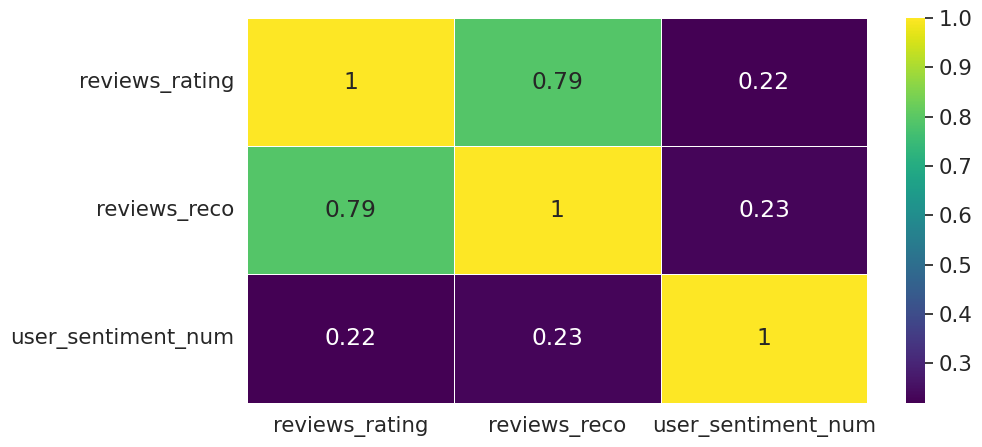

In [116]:
numeric_reviews = reviews.select_dtypes(include=['number'])  # Only numeric columns
sns.set(font_scale=1.4)
plt.figure(figsize=(10,5))
sns.heatmap(numeric_reviews.corr(), cmap='viridis', annot=True, linewidths=.5)
plt.show()

### As we see from above the reviews_rating & reviews_reco have a good correlation, however there is no significant correlation between these and the user_sentiment. This drives us to the analysis of the text fields

### Lets analyse what words users use the most in the reviews

In [38]:
!pip install wordcloud

In [39]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(df, column):
    """
    Function to generate and display a Word Cloud from a dataframe column.

    Parameters:
        df (pd.DataFrame): The dataframe containing text data.
        column (str): The name of the column with text data.
    """
    # Combine all text from the column
    text = " ".join(df[column].dropna().astype(str))  # Drop NaN & convert to string

    stopwords = set(STOPWORDS)  # Default stopwords from wordcloud
    stopwords.update(["review","part","use","one","product"])
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap='viridis',
                          max_words=200,
                          stopwords=stopwords,  # Remove stopwords
                          contour_color='steelblue').generate(text)
    # Plot the Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide axes
    plt.title("Word Cloud of Reviews", fontsize=14)
    plt.show()


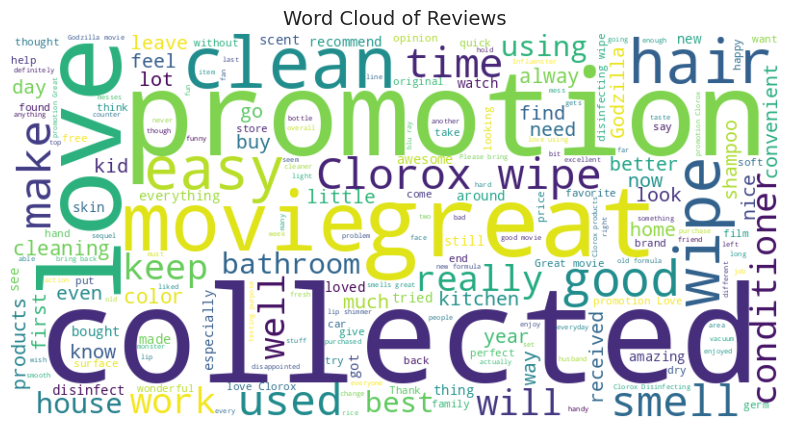

In [40]:
# Plot the word cloud for reviews_text
plot_wordcloud(reviews, "reviews_text")

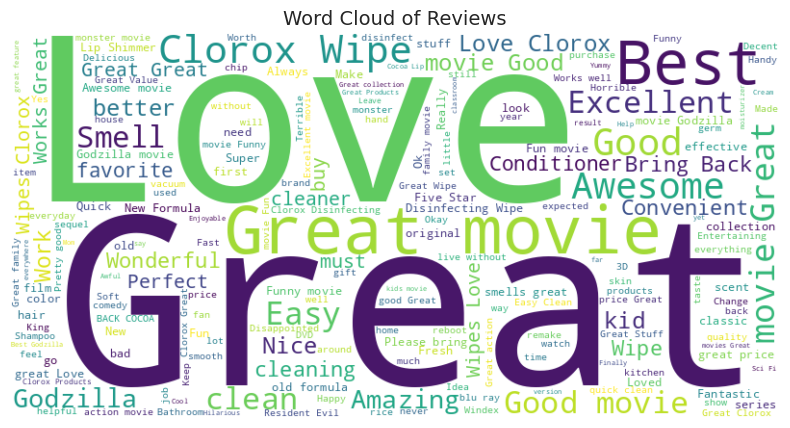

In [41]:
# Plot the word cloud for reviews_title
plot_wordcloud(reviews, "reviews_title")

In [117]:
# Lets have a combined field that joins the review title and text

reviews["combined_title_text"] = reviews["reviews_title"].astype(str) + " " + reviews["reviews_text"].astype(str)

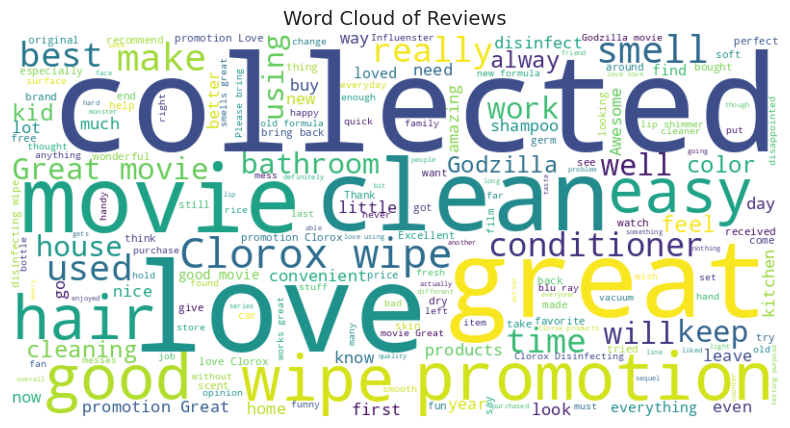

In [43]:
# Plot the word cloud for combined_title_text
plot_wordcloud(reviews, "combined_title_text")

## <p style="color: green;">3. Text Preprocessing</p>

In [118]:
reviews_copy2 = reviews.copy()

In [119]:
from nltk.tokenize import RegexpTokenizer

In [120]:
## Remove punctuation

tokenizer = RegexpTokenizer(r'\w+')

reviews['reviews_text'] = reviews['reviews_text'].apply(lambda x: tokenizer.tokenize(str(x).lower()))
reviews['reviews_title'] = reviews['reviews_title'].apply(lambda x: tokenizer.tokenize(str(x).lower()))
reviews['combined_title_text'] = reviews['combined_title_text'].apply(lambda x: tokenizer.tokenize(str(x).lower()))

In [121]:
reviews['reviews_text'].head(20)

,reviews_text
0,"[i, love, this, album, it, s, very, good, more..."
1,"[good, flavor, this, review, was, collected, a..."
2,"[good, flavor]"
3,"[i, read, through, the, reviews, on, here, bef..."
4,"[my, husband, bought, this, gel, for, us, the,..."
5,"[my, boyfriend, and, i, bought, this, to, spic..."
6,"[bought, this, earlier, today, and, was, excit..."
7,"[i, bought, this, product, for, my, husband, a..."
8,"[my, husband, and, i, bought, this, for, some,..."
9,"[got, as, a, surprise, for, my, husband, there..."


In [122]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [123]:
from nltk.corpus import stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [124]:
reviews['reviews_text'] = reviews['reviews_text'].apply(lambda x: remove_stopwords(x))
reviews['reviews_title'] = reviews['reviews_title'].apply(lambda x: remove_stopwords(x))
reviews['combined_title_text'] = reviews['combined_title_text'].apply(lambda x: remove_stopwords(x))

In [125]:
reviews['reviews_text'].head(20)

,reviews_text
0,"[love, album, good, hip, hop, side, current, p..."
1,"[good, flavor, review, collected, part, promot..."
2,"[good, flavor]"
3,"[read, reviews, looking, buying, one, couples,..."
4,"[husband, bought, gel, us, gel, caused, irrita..."
5,"[boyfriend, bought, spice, things, bedroom, hi..."
6,"[bought, earlier, today, excited, check, based..."
7,"[bought, product, husband, try, impressed, tin..."
8,"[husband, bought, extra, fun, werevboth, extre..."
9,"[got, surprise, husband, nothing, special, lub..."


In [146]:
reviews['combined_title_text'].head(20)

,combined_title_text
0,"[awesome, love, album, good, hip, hop, side, c..."
1,"[good, good, flavor, review, collected, part, ..."
2,"[good, good, flavor]"
3,"[disappointed, read, reviews, looking, buying,..."
4,"[irritation, husband, bought, gel, us, gel, ca..."
5,"[worth, boyfriend, bought, spice, things, bedr..."
6,"[disappointing, bought, earlier, today, excite..."
7,"[happy, bought, product, husband, try, impress..."
8,"[disappointing, husband, bought, extra, fun, w..."
9,"[buy, got, surprise, husband, nothing, special..."


In [147]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         29859 non-null  object
 4   name                 30000 non-null  object
 5   reviews_date         29954 non-null  object
 6   reviews_didPurchase  30000 non-null  object
 7   reviews_doRecommend  30000 non-null  object
 8   reviews_rating       30000 non-null  int64 
 9   reviews_text         30000 non-null  object
 10  reviews_title        30000 non-null  object
 11  reviews_username     29937 non-null  object
 12  user_sentiment       29999 non-null  object
 13  reviews_reco         30000 non-null  int64 
 14  user_sentiment_num   30000 non-null  int64 
 15  combined_title_text  30000 non-null  object
dtypes: i

In [148]:
import pickle

with open(filepath + "processed_reviews.pkl", "wb") as f:
    pickle.dump(reviews, f)

In [138]:
reviews.to_csv("processed_reviews.csv", index=False)

## <p style="color: green;">4. Feature Extraction</p>

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
all_text = reviews['reviews_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

In [57]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3) )
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(all_text)

In [58]:
y = reviews["user_sentiment_num"]

In [59]:
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 108

X_train, X_test, y_train, y_test = train_test_split(train_word_features, y, test_size=0.3, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (21000, 503293)
y_train (21000,)
X_test (9000, 503293)
y_test (9000,)


## <p style="color: green;">Model Building Iteration 1</p>

### Using word features extracted from reviews_text with TFIDF

### Model 1 - Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()
classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=seed, n_jobs=-1)
classifier.fit(X_train, y_train)
preds1 = classifier.predict(X_test)

time_taken = time.time() -time1
print('Time taken: {:.2f} seconds'.format(time_taken))

Time taken: 449.43 seconds


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Random Forest Model accuracy", accuracy_score(preds1, y_test))
print(classification_report(preds1, y_test))
print(confusion_matrix(preds1, y_test))

Random Forest Model accuracy 0.9125555555555556
              precision    recall  f1-score   support

           0       0.25      0.88      0.39       288
           1       1.00      0.91      0.95      8712

    accuracy                           0.91      9000
   macro avg       0.62      0.90      0.67      9000
weighted avg       0.97      0.91      0.93      9000

[[ 253   35]
 [ 752 7960]]


### Model 2 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
time1 = time.time()
logit = LogisticRegression(C=1)
logit.fit(X_train, y_train)
preds3 = logit.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 5.70 seconds


In [ ]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

Logistic Regression accuracy 0.8926666666666667
              precision    recall  f1-score   support

           0       0.04      0.90      0.08        49
           1       1.00      0.89      0.94      8951

    accuracy                           0.89      9000
   macro avg       0.52      0.90      0.51      9000
weighted avg       0.99      0.89      0.94      9000

[[  44    5]
 [ 961 7990]]


### Model 3 - XGBoost

In [ ]:
import xgboost as xgb
time1 = time.time()

xgb = xgb.XGBClassifier(n_jobs=1)
xgb.fit(X_train, y_train)
preds2 = xgb.predict(X_test)

time_taken = time.time() - time1
print('Time taken: {:.2f} seconds'.format(time_taken))

Time taken: 98.80 seconds


In [ ]:
print("XGBoost Model accuracy", accuracy_score(preds2, y_test))
print(classification_report(preds2, y_test))
print(confusion_matrix(preds2, y_test))

XGBoost Model accuracy 0.9372222222222222
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       874
           1       0.97      0.96      0.96      8126

    accuracy                           0.94      9000
   macro avg       0.81      0.85      0.83      9000
weighted avg       0.94      0.94      0.94      9000

[[ 657  217]
 [ 348 7778]]


## <p style="color: green;">Model Building Iteration 2</p>

### Using word features extracted from combined_title_text with TFIDF

In [ ]:
all_text2 = reviews['combined_title_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

In [ ]:
word_vectorizer2 = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3) )
word_vectorizer2.fit(all_text2)
train_word_features2 = word_vectorizer2.transform(all_text2)

In [ ]:
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 108

X_train, X_test, y_train, y_test = train_test_split(train_word_features2, y, test_size=0.3, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (21000, 559405)
y_train (21000,)
X_test (9000, 559405)
y_test (9000,)


### Model 1 - Random forest classifier

In [ ]:
time1 = time.time()
classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=seed, n_jobs=-1)
classifier.fit(X_train, y_train)
preds1 = classifier.predict(X_test)

time_taken = time.time() -time1
print('Time taken: {:.2f} seconds'.format(time_taken))

Time taken: 449.51 seconds


In [ ]:
print("Random Forest Model accuracy", accuracy_score(preds1, y_test))
print(classification_report(preds1, y_test))
print(confusion_matrix(preds1, y_test))

Random Forest Model accuracy 0.9048888888888889
              precision    recall  f1-score   support

           0       0.16      0.94      0.27       171
           1       1.00      0.90      0.95      8829

    accuracy                           0.90      9000
   macro avg       0.58      0.92      0.61      9000
weighted avg       0.98      0.90      0.94      9000

[[ 160   11]
 [ 845 7984]]


### Model 2 - Logistic Regression

In [ ]:
time1 = time.time()
logit = LogisticRegression(C=1)
logit.fit(X_train, y_train)
preds3 = logit.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 7.19 seconds


In [ ]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

Logistic Regression accuracy 0.8924444444444445
              precision    recall  f1-score   support

           0       0.04      0.97      0.07        39
           1       1.00      0.89      0.94      8961

    accuracy                           0.89      9000
   macro avg       0.52      0.93      0.51      9000
weighted avg       1.00      0.89      0.94      9000

[[  38    1]
 [ 967 7994]]


### Model 3: XGBoost

In [ ]:
import xgboost as xgb
time1 = time.time()

xgb = xgb.XGBClassifier(n_jobs=1)
xgb.fit(X_train, y_train)
preds2 = xgb.predict(X_test)

time_taken = time.time() - time1
print('Time taken: {:.2f} seconds'.format(time_taken))

Time taken: 123.80 seconds


In [ ]:
print("XGBoost Model accuracy", accuracy_score(preds2, y_test))
print(classification_report(preds2, y_test))
print(confusion_matrix(preds2, y_test))

XGBoost Model accuracy 0.9153333333333333
              precision    recall  f1-score   support

           0       0.35      0.76      0.48       461
           1       0.99      0.92      0.95      8539

    accuracy                           0.92      9000
   macro avg       0.67      0.84      0.72      9000
weighted avg       0.95      0.92      0.93      9000

[[ 352  109]
 [ 653 7886]]


### We see a reduction in accuracy with the combined title and text being used. Lets experiment with more features on the review_text

## <p style="color: green;">Model Building Iteration 3</p>

### Using word & character features extracted from reviews_text with TFIDF

In [128]:
all_text = reviews['reviews_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

In [129]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3) )
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(all_text)

In [130]:
from scipy.sparse import hstack

In [131]:
#Extract character features and stack them with word features

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(all_text)

train_features = hstack([train_char_features, train_word_features])

In [132]:
print(filepath)

/content/drive/My Drive/Capstone/


In [134]:
import pickle

# Save word vectorizer
with open(filepath+"word_vectorizer.pkl", "wb") as f:
    pickle.dump(word_vectorizer, f)

# Save character vectorizer
with open(filepath+"char_vectorizer.pkl", "wb") as f:
    pickle.dump(char_vectorizer, f)

print("Vectorizers saved successfully!")

Vectorizers saved successfully!


In [64]:
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 108

X_train, X_test, y_train, y_test = train_test_split(train_features, y, test_size=0.3, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (21000, 553293)
y_train (21000,)
X_test (9000, 553293)
y_test (9000,)


### Model 1 - Random Forest Classifier

In [ ]:
time1 = time.time()
classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=seed, n_jobs=-1)
classifier.fit(X_train, y_train)
preds1 = classifier.predict(X_test)

time_taken = time.time() -time1
print('Time taken: {:.2f} seconds'.format(time_taken))

Time taken: 136.83 seconds


In [ ]:
print("Random Forest Model accuracy", accuracy_score(preds1, y_test))
print(classification_report(preds1, y_test))
print(confusion_matrix(preds1, y_test))

Random Forest Model accuracy 0.9132222222222223
              precision    recall  f1-score   support

           0       0.24      0.92      0.39       268
           1       1.00      0.91      0.95      8732

    accuracy                           0.91      9000
   macro avg       0.62      0.92      0.67      9000
weighted avg       0.97      0.91      0.94      9000

[[ 246   22]
 [ 759 7973]]


### Model 2 - Logistic Regression

In [ ]:
time1 = time.time()
logit = LogisticRegression(C=1)
logit.fit(X_train, y_train)
preds3 = logit.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 10.72 seconds


In [ ]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

Logistic Regression accuracy 0.9167777777777778
              precision    recall  f1-score   support

           0       0.28      0.91      0.43       316
           1       1.00      0.92      0.96      8684

    accuracy                           0.92      9000
   macro avg       0.64      0.91      0.69      9000
weighted avg       0.97      0.92      0.94      9000

[[ 286   30]
 [ 719 7965]]


### Model 3 : XGBoost

In [65]:
import xgboost as xgb
time1 = time.time()

xgb = xgb.XGBClassifier(n_jobs=1)
xgb.fit(X_train, y_train)
preds2 = xgb.predict(X_test)

time_taken = time.time() - time1
print('Time taken: {:.2f} seconds'.format(time_taken))

Time taken: 301.08 seconds


In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("XGBoost Model accuracy", accuracy_score(preds2, y_test))
print(classification_report(preds2, y_test))
print(confusion_matrix(preds2, y_test))

XGBoost Model accuracy 0.9426666666666667
              precision    recall  f1-score   support

           0       0.63      0.81      0.71       777
           1       0.98      0.95      0.97      8223

    accuracy                           0.94      9000
   macro avg       0.81      0.88      0.84      9000
weighted avg       0.95      0.94      0.95      9000

[[ 633  144]
 [ 372 7851]]


### XGBoost gives the best accuracy - so we continue with it for further enhancement
### Lets experiment with the hyperparameters for XGBoost

In [68]:
import xgboost as xgb
time1 = time.time()

#increase n_estimators from 100 to 300, max_depth from 6 to 8
xgb = xgb.XGBClassifier(n_estimators = 300, n_jobs=1, max_depth = 8)
xgb.fit(X_train, y_train)
preds2 = xgb.predict(X_test)

time_taken = time.time() - time1
print('Time taken: {:.2f} seconds'.format(time_taken))

Time taken: 992.40 seconds


In [69]:
print("XGBoost Model accuracy", accuracy_score(preds2, y_test))
print(classification_report(preds2, y_test))
print(confusion_matrix(preds2, y_test))

XGBoost Model accuracy 0.9444444444444444
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       791
           1       0.98      0.96      0.97      8209

    accuracy                           0.94      9000
   macro avg       0.81      0.89      0.85      9000
weighted avg       0.95      0.94      0.95      9000

[[ 648  143]
 [ 357 7852]]


### Lets experiment with the train and test split - 80-20 instead of 70-30

In [70]:
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 108

X_train, X_test, y_train, y_test = train_test_split(train_features, y, test_size=0.2, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (24000, 553293)
y_train (24000,)
X_test (6000, 553293)
y_test (6000,)


In [72]:
import xgboost as xgb
time1 = time.time()

#increase n_estimators from 100 to 300, max_depth from 6 to 8
xgb2 = xgb.XGBClassifier(n_estimators = 300, n_jobs=1, max_depth = 8)
xgb2.fit(X_train, y_train)
preds2 = xgb2.predict(X_test)

time_taken = time.time() - time1
print('Time taken: {:.2f} seconds'.format(time_taken))

Time taken: 1112.71 seconds


In [73]:
print("XGBoost Model accuracy", accuracy_score(preds2, y_test))
print(classification_report(preds2, y_test))
print(confusion_matrix(preds2, y_test))

XGBoost Model accuracy 0.9496666666666667
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       541
           1       0.99      0.96      0.97      5459

    accuracy                           0.95      6000
   macro avg       0.83      0.91      0.86      6000
weighted avg       0.96      0.95      0.95      6000

[[ 462   79]
 [ 223 5236]]


In [79]:
# As this is the best accuracy so far, saving the model as a pickle file
import pickle
filepath = "/content/drive/My Drive/Capstone/"
filename = 'xgb_model.pkl'
pickle.dump(xgb2, open(filepath + filename, 'wb'))

### Lets apply stemming to check if it improves the accuracy

In [80]:
#Stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

In [81]:
reviews['reviews_text'] = reviews['reviews_text'].apply(lambda x: word_stemmer(x))

In [82]:
all_text = reviews['reviews_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

In [83]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3) )
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(all_text)

In [84]:
#Extract character features and stack them with word features

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(all_text)

train_features = hstack([train_char_features, train_word_features])

In [85]:
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 108

X_train, X_test, y_train, y_test = train_test_split(train_features, y, test_size=0.2, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (24000, 63076)
y_train (24000,)
X_test (6000, 63076)
y_test (6000,)


In [86]:
import xgboost as xgb
time1 = time.time()

#increase n_estimators from 100 to 300, max_depth from 6 to 8
xgb3 = xgb.XGBClassifier(n_estimators = 300, n_jobs=1, max_depth = 8)
xgb3.fit(X_train, y_train)
preds2 = xgb3.predict(X_test)

time_taken = time.time() - time1
print('Time taken: {:.2f} seconds'.format(time_taken))

Time taken: 896.04 seconds


In [87]:
print("XGBoost Model accuracy", accuracy_score(preds2, y_test))
print(classification_report(preds2, y_test))
print(confusion_matrix(preds2, y_test))

XGBoost Model accuracy 0.9348333333333333
              precision    recall  f1-score   support

           0       0.55      0.82      0.66       462
           1       0.98      0.94      0.96      5538

    accuracy                           0.93      6000
   macro avg       0.77      0.88      0.81      6000
weighted avg       0.95      0.93      0.94      6000

[[ 378   84]
 [ 307 5231]]


### Stemming has reduced the accuracy - so we will stay with the saved model

## Recommendation System

### Load the data

In [ ]:
ratings = pd.read_csv("sample30.csv")

In [ ]:
ratings.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [ ]:
# Lets retain only the columns that are important for recommendation
ratings = ratings.drop(['categories', 'reviews_date','reviews_didPurchase','reviews_doRecommend'
                        ,'reviews_text', 'reviews_title','reviews_userCity','reviews_userProvince',
                       'user_sentiment'], axis=1)

In [ ]:
ratings.head()

,id,brand,manufacturer,name,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,rebecca
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,walker557


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                30000 non-null  object
 1   brand             30000 non-null  object
 2   manufacturer      29859 non-null  object
 3   name              30000 non-null  object
 4   reviews_rating    30000 non-null  int64 
 5   reviews_username  29937 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [ ]:
ratings.shape

(30000, 6)

In [ ]:
ratings.reviews_username.isnull().sum()

63

In [ ]:
# Drop missing usernames as they are required for user-based filtering
df = ratings.dropna(subset=['reviews_username'])

In [ ]:
df.shape

(29937, 6)

In [ ]:
review_counts = df.groupby('reviews_username').size().reset_index(name='review_count')
# Sort in descending order
review_counts = review_counts.sort_values(by='review_count', ascending=False)

# Display the result
print(review_counts[review_counts['review_count'] > 10])

        reviews_username  review_count
3403   byamazon customer            41
15805               mike            41
4749               chris            32
13806               lisa            16
19558               rick            15
23456               tony            15
20300              sandy            15
6142                dave            14
11293               john            14
10082              james            13
11349               jojo            13
13733              linda            12
15138               matt            12
16737         movielover            12
14971               mark            11
10569               jenn            11
4911               cindy            11
23100             thomas            11
13321              laura            11
20566              scott            11
6923               donna            11


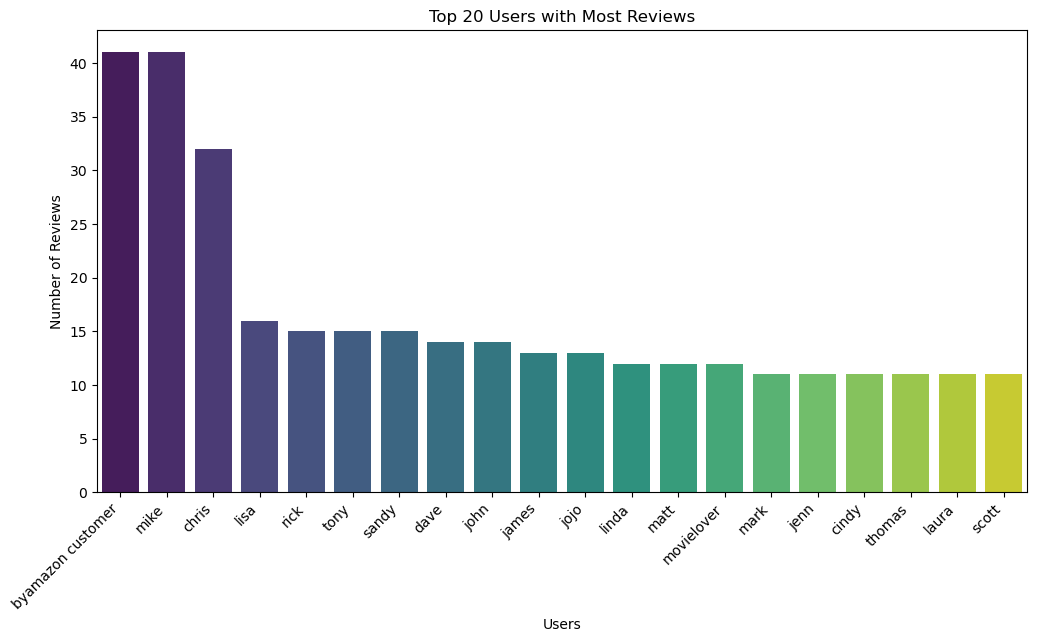

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot bar graph (Top 20 users for better visibility)
plt.figure(figsize=(12, 6))
sns.barplot(x=review_counts['reviews_username'][:20], y=review_counts['review_count'][:20], palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.xlabel("Users")
plt.ylabel("Number of Reviews")
plt.title("Top 20 Users with Most Reviews")
plt.show()

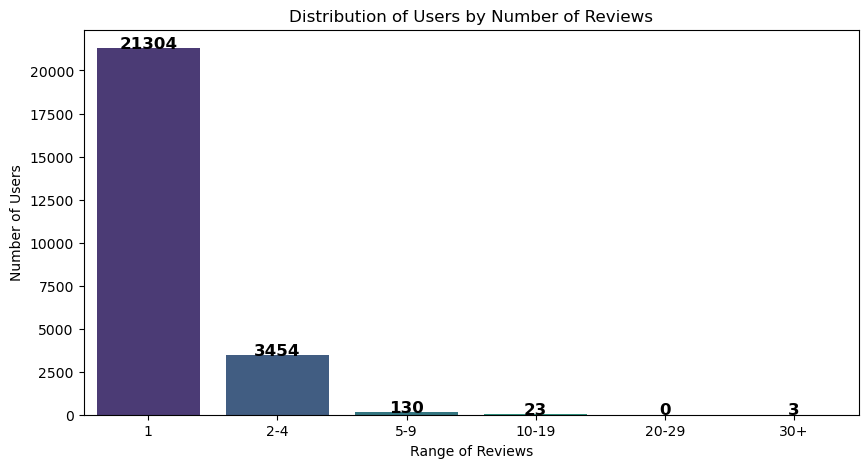

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by username and count reviews
review_counts = df.groupby('reviews_username').size().reset_index(name='review_count')

# Ensure the last bin is at least greater than max count
max_reviews = review_counts['review_count'].max()
bins = [1, 2, 5, 10, 20, 30, max_reviews + 1]  # Ensure bins are increasing
labels = ["1", "2-4", "5-9", "10-19", "20-29", "30+"]

# Categorize users into bins
review_counts['review_range'] = pd.cut(review_counts['review_count'], bins=bins, labels=labels, right=False)

# Count number of users per range
range_counts = review_counts['review_range'].value_counts().sort_index()

# Plot bar graph
plt.figure(figsize=(10, 5))
ax= sns.barplot(x=range_counts.index, y=range_counts.values, palette='viridis')

# Add text labels on top of bars
for index, value in enumerate(range_counts.values):
    ax.text(index, value + 2, str(value), ha='center', fontsize=12, fontweight='bold', color='black')


# Labels and title
plt.xlabel("Range of Reviews")
plt.ylabel("Number of Users")
plt.title("Distribution of Users by Number of Reviews")
plt.show()


### Divide data set into train and test

In [ ]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20, random_state=108)

In [ ]:
print(train.shape)
print(test.shape)

(23949, 6)
(5988, 6)


In [ ]:
# Pivot the train ratings' dataset into matrix format in which columns are product name and the rows are username.

df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating',
    aggfunc='mean'
).fillna(0)

df_pivot.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_pivot.shape

(20486, 261)

In [ ]:
unique_user_count = train['reviews_username'].nunique()

In [ ]:
print(unique_user_count)

20486


### Creating dummy train & dummy test dataset

In [ ]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [ ]:
# The movies not rated by user is marked as 1 for prediction.
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [ ]:
# Convert the dummy train dataset into matrix format.
dummy_train = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating',
    aggfunc='mean'
).fillna(1)

In [ ]:
dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### User cosine similarity using adjusted cosine

In [ ]:
# Create a user-movie matrix.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating',
    aggfunc='mean'
).fillna(0)

In [ ]:
df_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [ ]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,...,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326
00sab00,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,...,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326
01impala,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,...,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494
02dakota,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,...,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157
0325home,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,...,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157


### Find cosine similarity

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.         -0.00487067 -0.00384615 ... -0.00384615 -0.00384615
  -0.00384615]
 [-0.00487067  1.         -0.00487067 ... -0.00487067  0.94856216
  -0.00487067]
 [-0.00384615 -0.00487067  1.         ... -0.00384615 -0.00384615
  -0.00384615]
 ...
 [-0.00384615 -0.00487067 -0.00384615 ...  1.         -0.00384615
   1.        ]
 [-0.00384615  0.94856216 -0.00384615 ... -0.00384615  1.
  -0.00384615]
 [-0.00384615 -0.00487067 -0.00384615 ...  1.         -0.00384615
   1.        ]]


In [ ]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.94856216,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.94856216, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ]])

### Prediction User-User

In [ ]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[ 0.        ,  0.        ,  0.        , ...,  1.81535351,
         0.        ,  0.        ],
       [ 0.        ,  2.99016114,  0.        , ...,  8.22533965,
         2.82831996,  1.24211469],
       [ 0.        , 29.08176051,  0.        , ..., 18.39441144,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  5.20684933,  0.        , ...,  4.78244542,
         2.3049114 ,  0.        ],
       [ 0.        ,  0.78148873,  0.        , ...,  6.10010199,
         2.98512278,  1.09898278],
       [ 0.        ,  5.20684933,  0.        , ...,  4.78244542,
         2.3049114 ,  0.        ]])

In [ ]:
user_predicted_ratings.shape

(20486, 261)

In [ ]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.119723,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.815354,0.000000,0.000000
00sab00,0.0,2.990161,0.0,0.0,3.342888,0.0,0.0,0.0,0.0,8.222343,...,1.971415,0.0,0.0,0.000000,1.778889,0.0,0.0,8.225340,2.828320,1.242115
01impala,0.0,29.081761,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,17.302507,...,3.893045,0.0,0.0,0.000000,1.366900,0.0,0.0,18.394411,0.000000,0.000000
02dakota,0.0,29.081761,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,17.302507,...,3.893045,0.0,0.0,0.000000,1.366900,0.0,0.0,18.394411,0.000000,0.000000
0325home,0.0,5.206849,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,8.484400,...,0.000000,0.0,0.0,2.875627,0.000000,0.0,0.0,4.782445,2.304911,0.000000


### Find top 5 reco for a user

In [ ]:
# Take the user ID as input.
user_input = input("Enter your user name")
print(user_input)

Enter your user name02dakota
02dakota


In [ ]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd        52858.175694
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)      162.137272
Mike Dave Need Wedding Dates (dvd + Digital)                             151.720002
The Resident Evil Collection 5 Discs (blu-Ray)                           112.037843
Red (special Edition) (dvdvideo)                                          83.691452
Name: 02dakota, dtype: float64

In [ ]:
user_final_rating.index.nunique()

20486

In [ ]:
ratings.reviews_username.nunique()

24914

### Evaluation User-User

In [ ]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1459, 6)

In [ ]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [ ]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [ ]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20476,20477,20478,20479,20480,20481,20482,20483,20484,20485
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948562,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948562,0.0
01impala,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
02dakota,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
0325home,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,1.0


In [ ]:
users_list = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(users_list)]

In [ ]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(users_list)]

In [ ]:
user_correlation_df_3 = user_correlation_df_2.T

In [ ]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[ 0.        ,  5.26745659,  1.2990922 , ..., 14.84963275,
         0.        ,  1.47525155],
       [ 0.        ,  4.        ,  0.        , ..., 15.63187616,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.39573289,  1.10525455,  1.22382676, ...,  1.43387314,
         0.        ,  0.        ],
       [ 0.        ,  0.36120629,  0.        , ..., 38.63825974,
         0.        ,  0.        ],
       [ 0.        ,  4.        ,  0.        , ..., 15.63187616,
         0.        ,  0.        ]])

In [ ]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [ ]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [ ]:
common_user_predicted_ratings.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter","BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Tresemme Kertatin Smooth Infusing Conditioning,Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ...  5. nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.0491515948191377


### RMSE with User-User Similarity using Adjusted Cosine - 2.049.
- This is high considering the ratings range of 1-5

### Item Item Similarity

In [ ]:

df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating',
    aggfunc='mean'
).T

df_pivot.head()

reviews_username,00dog3,00sab00,01impala,02dakota,0325home,06stidriver,08dallas,09mommy11,1085,10ten,...,zowie,zozo0o,zsazsa,zubb,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [ ]:
df_subtracted.head()

reviews_username,00dog3,00sab00,01impala,02dakota,0325home,06stidriver,08dallas,09mommy11,1085,10ten,...,zowie,zozo0o,zsazsa,zubb,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,0.291304,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
item_correlation.shape

(261, 261)

In [ ]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.01570742, 0.        ,
        0.        ],
       [0.        , 0.01811771, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03135884, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00058797,
        0.        ],
       [0.        , 0.03019619, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00117594,
        0.        ]])

In [ ]:
item_predicted_ratings.shape

(20486, 261)

In [ ]:
dummy_train.shape

(20486, 261)

In [ ]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.015707,0.00000,0.0
00sab00,0.0,0.018118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033681,...,0.013746,0.0,0.0,0.000000,0.022062,0.0,0.0,0.000000,0.00000,0.0
01impala,0.0,0.031359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.003692,0.0,0.0,0.000000,0.006957,0.0,0.0,0.000000,0.00000,0.0
02dakota,0.0,0.052265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.006153,0.0,0.0,0.000000,0.011596,0.0,0.0,0.000000,0.00000,0.0
0325home,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000407,...,0.000000,0.0,0.0,0.003973,0.000000,0.0,0.0,0.000000,0.00147,0.0


In [ ]:
# Take the user ID as input
user_input = input("Enter your user name")
print(user_input)

Enter your user name02dakota
02dakota


In [ ]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd        25.000000
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)     0.064714
Newman's Own Organics Licorice Twist, Black 5oz                         0.060656
Power Crunch Protein Energy Bar Peanut Butter Creme Original            0.059289
100:Complete First Season (blu-Ray)                                     0.052265
Name: 02dakota, dtype: float64

In [ ]:
test.columns

Index(['id', 'brand', 'manufacturer', 'name', 'reviews_rating',
       'reviews_username'],
      dtype='object')

In [ ]:
common =  test[test.name.isin(train.name)]
common.shape

(5978, 6)

In [ ]:
common.head(4)

,id,brand,manufacturer,name,reviews_rating,reviews_username
12628,AVpf3VOfilAPnD_xjpun,Clorox,Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,5,dee44
10759,AVpf3VOfilAPnD_xjpun,Clorox,Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,5,desa
5051,AVpf0eb2LJeJML43EVSt,Sony Pictures,SONY CORP,The Resident Evil Collection 5 Discs (blu-Ray),5,cdearle
4617,AVpf0eb2LJeJML43EVSt,Sony Pictures,SONY CORP,The Resident Evil Collection 5 Discs (blu-Ray),4,netherrealmbum


In [ ]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [ ]:
common_item_based_matrix.shape

(189, 5720)

In [ ]:
common_item_based_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest to Yes To Grapefruit Rejuvenating Body Wash
Columns: 5720 entries, 02deuce to zyiah4
dtypes: float64(5720)
memory usage: 8.2+ MB


In [ ]:
name_list_common = common_item_based_matrix.index.to_list()

In [ ]:
len(name_list_common)

189

In [ ]:
item_correlation_df = pd.DataFrame(item_correlation)

In [ ]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list_name = common_item_based_matrix.index.to_list()

In [ ]:
len(list_name)

189

In [ ]:
unique_names = list(set(list_name))
len(unique_names)

189

In [ ]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [ ]:
item_correlation_df_1.shape

(189, 261)

In [ ]:
item_correlation_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest to Yes To Grapefruit Rejuvenating Body Wash
Columns: 261 entries, 0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest to Yes To Grapefruit Rejuvenating Body Wash
dtypes: float64(261)
memory usage: 386.9+ KB


In [ ]:
item_correlation_df_1.index.nunique()

189

In [ ]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [ ]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04181178, 0.        , 0.        , ..., 0.0128412 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00146992, 0.00117594, ..., 0.        , 0.00146992,
        0.00146992],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
common_item_predicted_ratings.shape

(189, 5720)

In [ ]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [ ]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.597245063954202


### RMSE for Item-Item based similarity using adjusted cosine is 3.59
- This is even higher considering the ratings range 1-5

### User-User based filtering with Pearson correlation

### Divide data set into train and test

In [ ]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20, random_state=108)

In [ ]:
print(train.shape)
print(test.shape)

(23949, 6)
(5988, 6)


In [ ]:
# Pivot the train ratings' dataset into matrix format in which columns are product name and the rows are username.

df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating',
    aggfunc='mean'
)

df_pivot.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_pivot.shape

(20486, 261)

In [ ]:
unique_user_count = train['reviews_username'].nunique()

In [ ]:
print(unique_user_count)

20486


### Creating dummy train & dummy test dataset

In [ ]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [ ]:
# The movies not rated by user is marked as 1 for prediction.
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [ ]:
# Convert the dummy train dataset into matrix format.
dummy_train = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating',
    aggfunc='mean'
).fillna(1)

In [ ]:
dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Create a user-product matrix.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating',
    aggfunc='mean'
).fillna(0)

In [ ]:
df_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [ ]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,...,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326
00sab00,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,...,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326,-0.015326
01impala,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,...,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494,-0.011494
02dakota,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,...,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157
0325home,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,...,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157,-0.019157


In [ ]:
user_correlation = df_subtracted.fillna(0).T.corr(method='pearson')
user_correlation

reviews_username,00dog3,00sab00,01impala,02dakota,0325home,06stidriver,08dallas,09mommy11,1085,10ten,...,zowie,zozo0o,zsazsa,zubb,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.000000,-0.004871,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,...,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846
00sab00,-0.004871,1.000000,-0.004871,-0.004871,-0.004871,-0.004871,-0.004871,-0.004871,0.948562,-0.004871,...,-0.004871,-0.004871,-0.004871,-0.004871,-0.004871,-0.004871,-0.004871,-0.004871,0.948562,-0.004871
01impala,-0.003846,-0.004871,1.000000,1.000000,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,...,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846
02dakota,-0.003846,-0.004871,1.000000,1.000000,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,...,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846
0325home,-0.003846,-0.004871,-0.003846,-0.003846,1.000000,1.000000,-0.003846,-0.003846,-0.003846,-0.003846,...,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,1.000000,1.000000,1.000000,-0.003846,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwithanx,-0.003846,-0.004871,-0.003846,-0.003846,1.000000,1.000000,-0.003846,-0.003846,-0.003846,-0.003846,...,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,1.000000,1.000000,1.000000,-0.003846,1.000000
zxcsdfd,-0.003846,-0.004871,-0.003846,-0.003846,1.000000,1.000000,-0.003846,-0.003846,-0.003846,-0.003846,...,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,1.000000,1.000000,1.000000,-0.003846,1.000000
zxjki,-0.003846,-0.004871,-0.003846,-0.003846,1.000000,1.000000,-0.003846,-0.003846,-0.003846,-0.003846,...,-0.003846,-0.003846,-0.003846,-0.003846,-0.003846,1.000000,1.000000,1.000000,-0.003846,1.000000


In [ ]:
user_correlation[user_correlation<0]=0
user_correlation

reviews_username,00dog3,00sab00,01impala,02dakota,0325home,06stidriver,08dallas,09mommy11,1085,10ten,...,zowie,zozo0o,zsazsa,zubb,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
00sab00,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.948562,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948562,0.0
01impala,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
02dakota,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
0325home,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwithanx,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,1.0
zxcsdfd,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,1.0
zxjki,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,1.0


### Prediction User-User

In [ ]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[ 0.        ,  0.        ,  0.        , ...,  1.81535351,
         0.        ,  0.        ],
       [ 0.        ,  2.99016114,  0.        , ...,  8.22533965,
         2.82831996,  1.24211469],
       [ 0.        , 29.08176051,  0.        , ..., 18.39441144,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  5.20684933,  0.        , ...,  4.78244542,
         2.3049114 ,  0.        ],
       [ 0.        ,  0.78148873,  0.        , ...,  6.10010199,
         2.98512278,  1.09898278],
       [ 0.        ,  5.20684933,  0.        , ...,  4.78244542,
         2.3049114 ,  0.        ]])

In [ ]:
user_predicted_ratings.shape

(20486, 261)

In [ ]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.119723,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.815354,0.000000,0.000000
00sab00,0.0,2.990161,0.0,0.0,3.342888,0.0,0.0,0.0,0.0,8.222343,...,1.971415,0.0,0.0,0.000000,1.778889,0.0,0.0,8.225340,2.828320,1.242115
01impala,0.0,29.081761,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,17.302507,...,3.893045,0.0,0.0,0.000000,1.366900,0.0,0.0,18.394411,0.000000,0.000000
02dakota,0.0,29.081761,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,17.302507,...,3.893045,0.0,0.0,0.000000,1.366900,0.0,0.0,18.394411,0.000000,0.000000
0325home,0.0,5.206849,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,8.484400,...,0.000000,0.0,0.0,2.875627,0.000000,0.0,0.0,4.782445,2.304911,0.000000


In [ ]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1459, 6)

In [ ]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [ ]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [ ]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

reviews_username,00dog3,00sab00,01impala,02dakota,0325home,06stidriver,08dallas,09mommy11,1085,10ten,...,zowie,zozo0o,zsazsa,zubb,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948562,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948562,0.0
01impala,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
02dakota,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
0325home,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,1.0


In [ ]:
users_list = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(users_list)]

In [ ]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(users_list)]

In [ ]:
user_correlation_df_3 = user_correlation_df_2.T

In [ ]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[ 0.        ,  5.26745659,  1.2990922 , ..., 14.84963275,
         0.        ,  1.47525155],
       [ 0.        ,  4.        ,  0.        , ..., 15.63187616,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.39573289,  1.10525455,  1.22382676, ...,  1.43387314,
         0.        ,  0.        ],
       [ 0.        ,  0.36120629,  0.        , ..., 38.63825974,
         0.        ,  0.        ],
       [ 0.        ,  4.        ,  0.        , ..., 15.63187616,
         0.        ,  0.        ]])

In [ ]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [ ]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [ ]:
common_user_predicted_ratings.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter","BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Tresemme Kertatin Smooth Infusing Conditioning,Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ...  5. nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.2710038868988147


### So far the user-user based collaborative filtering with adjusted cosine similarity has the best RMSE of 2.049
### Lets try this with stratified sampling of test and train to ensure each user will be available in the train data

In [2]:
filepath = "/content/drive/My Drive/Capstone"

In [7]:
ratings = pd.read_csv("/content/drive/My Drive/Capstone/sample30.csv")

In [8]:
ratings.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [9]:
# Lets retain only the columns that are important for recommendation
ratings = ratings.drop(['categories', 'reviews_date','reviews_didPurchase','reviews_doRecommend'
                        ,'reviews_text', 'reviews_title','reviews_userCity','reviews_userProvince',
                       'user_sentiment'], axis=1)

In [10]:
ratings.head()

,id,brand,manufacturer,name,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,rebecca
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,walker557


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                30000 non-null  object
 1   brand             30000 non-null  object
 2   manufacturer      29859 non-null  object
 3   name              30000 non-null  object
 4   reviews_rating    30000 non-null  int64 
 5   reviews_username  29937 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [12]:
ratings.shape

(30000, 6)

In [13]:
ratings.reviews_username.isnull().sum()

63

In [14]:
# Drop missing usernames as they are required for user-based filtering
df = ratings.dropna(subset=['reviews_username'])

In [15]:
df.shape

(29937, 6)

In [16]:
# Test and Train split of the dataset, ensuring every user appears in the train data
from sklearn.model_selection import train_test_split
users = df['reviews_username'].unique()
train_indices = []
test_indices = []

for user in users:
    user_data = df[df['reviews_username'] == user]
    if len(user_data) > 1:
        train_idx, test_idx = train_test_split(user_data.index, test_size=0.2, random_state=42)
        train_indices.extend(train_idx)
        test_indices.extend(test_idx)
    else:
        train_indices.extend(user_data.index)  # Keep single-review users in train set

train = df.loc[train_indices]
test = df.loc[test_indices]

In [17]:
print(train.shape)
print(test.shape)

(26193, 6)
(3744, 6)


In [18]:
# Pivot the train ratings' dataset into matrix format in which columns are product name and the rows are username.

df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating',
    aggfunc='mean'
).fillna(0)

df_pivot.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_pivot.shape

(24914, 267)

In [20]:
unique_user_count = train['reviews_username'].nunique()

In [21]:
print(unique_user_count)

24914


### Creating dummy train & dummy test dataset

In [22]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [23]:
# The movies not rated by user is marked as 1 for prediction.
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [24]:
# Convert the dummy train dataset into matrix format.
dummy_train = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating',
    aggfunc='mean'
).fillna(1)

In [25]:
dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### User cosine similarity using adjusted cosine

In [26]:
# Create a user-movie matrix.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating',
    aggfunc='mean'
).fillna(0)

In [27]:
df_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [29]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,...,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981
00sab00,-0.003745,-0.003745,-0.003745,-0.003745,-0.003745,-0.003745,-0.003745,-0.003745,-0.003745,-0.003745,...,-0.003745,-0.003745,-0.003745,-0.003745,-0.003745,-0.003745,-0.003745,-0.003745,-0.003745,-0.003745
01impala,-0.011236,-0.011236,-0.011236,-0.011236,-0.011236,-0.011236,-0.011236,-0.011236,-0.011236,-0.011236,...,-0.011236,-0.011236,-0.011236,-0.011236,-0.011236,-0.011236,-0.011236,-0.011236,-0.011236,-0.011236
02dakota,-0.018727,-0.018727,-0.018727,-0.018727,-0.018727,-0.018727,-0.018727,-0.018727,-0.018727,-0.018727,...,-0.018727,-0.018727,-0.018727,-0.018727,-0.018727,-0.018727,-0.018727,-0.018727,-0.018727,-0.018727
02deuce,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,...,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981,-0.014981


### Find cosine similarity

In [30]:
from sklearn.metrics.pairwise import pairwise_distances

In [31]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.        -0.0037594 -0.0037594 ... -0.0037594 -0.0037594 -0.0037594]
 [-0.0037594  1.        -0.0037594 ... -0.0037594 -0.0037594 -0.0037594]
 [-0.0037594 -0.0037594  1.        ... -0.0037594 -0.0037594 -0.0037594]
 ...
 [-0.0037594 -0.0037594 -0.0037594 ...  1.        -0.0037594  1.       ]
 [-0.0037594 -0.0037594 -0.0037594 ... -0.0037594  1.        -0.0037594]
 [-0.0037594 -0.0037594 -0.0037594 ...  1.        -0.0037594  1.       ]]


In [32]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [33]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

### Prediction User-User

In [34]:
user_correlation_df.shape

(24914, 24914)

In [35]:
df_pivot.shape

(24914, 267)

In [36]:
user_predicted_ratings = np.dot(user_correlation_df, df_pivot.fillna(0))
user_predicted_ratings

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  3.44623892,  0.        , ...,  1.34893069,
         0.        ,  0.77061927],
       [ 0.        , 13.87650132,  0.        , ..., 15.74796943,
         1.75340968,  3.73514007],
       ...,
       [ 0.        ,  3.0531874 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.67207054,  0.        , ...,  0.        ,
         2.19927671,  0.        ],
       [ 0.        ,  3.0531874 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [37]:
user_predicted_ratings.shape

(24914, 267)

In [38]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.119808,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
00sab00,0.0,3.446239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.558090,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,1.348931,0.00000,0.770619
01impala,0.0,13.876501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.153378,...,0.0,0.0,2.17986,0.0,0.0,0.0,0.0,15.747969,1.75341,3.735140
02dakota,0.0,13.876501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.153378,...,0.0,0.0,2.17986,0.0,0.0,0.0,0.0,15.747969,1.75341,3.735140
02deuce,0.0,13.876501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.153378,...,0.0,0.0,2.17986,0.0,0.0,0.0,0.0,15.747969,1.75341,3.735140


### Find top 20 reco for a user

In [39]:
# Take the user ID as input.
user_input = input("Enter your user name")
print(user_input)

Enter your user name00sab00
00sab00


In [40]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

,00sab00
name,
Mike Dave Need Wedding Dates (dvd + Digital),2725.755021
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,67.635876
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),30.328744
The Resident Evil Collection 5 Discs (blu-Ray),25.311814
Clorox Disinfecting Bathroom Cleaner,20.837041
Jason Aldean - They Don't Know,15.064546
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,13.969926
Red (special Edition) (dvdvideo),11.905480
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),11.393183


In [41]:
user_final_rating.index.nunique()

24914

In [42]:
ratings.reviews_username.nunique()

24914

### Evaluation User-User

In [43]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(3744, 6)

In [44]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [45]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,24904,24905,24906,24907,24908,24909,24910,24911,24912,24913
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,1.0,...,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
06stidriver,0.0,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,1.0,...,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
08dallas,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
users_list = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(users_list)]

In [47]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(users_list)]

In [48]:
user_correlation_df_3 = user_correlation_df_2.T

In [49]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[ 3.89975981,  0.        ,  0.        , ...,  7.32294994,
         0.        ,  0.        ],
       [ 9.95952367,  0.        ,  0.        , ..., 12.87707949,
         0.        ,  0.        ],
       [ 3.11980785,  0.        ,  4.        , ...,  4.7595666 ,
         0.        ,  0.        ],
       ...,
       [ 3.89975981,  0.        ,  0.        , ...,  7.32294994,
         0.        ,  0.        ],
       [ 3.11980785,  0.        ,  4.        , ...,  4.7595666 ,
         0.        ,  0.        ],
       [ 3.11980785,  0.        ,  4.        , ...,  4.7595666 ,
         0.        ,  0.        ]])

In [50]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [51]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [52]:
common_user_predicted_ratings.head(2)

name,100:Complete First Season (blu-Ray),Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",...,Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [54]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [55]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [56]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.028788706101261


In [57]:
ratings.reviews_username.nunique()

24914

In [58]:
train.reviews_username.nunique()

24914

In [59]:
user_final_rating.index.nunique()

24914

In [60]:
user_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.119808,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
00sab00,0.0,3.446239,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,6.558090,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,1.348931,0.000000,0.770619
01impala,0.0,13.876501,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,14.153378,...,0.0,0.0,2.17986,0.0,0.0,0.0,0.0,15.747969,1.753410,3.735140
02dakota,0.0,13.876501,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,14.153378,...,0.0,0.0,2.17986,0.0,0.0,0.0,0.0,15.747969,1.753410,3.735140
02deuce,0.0,13.876501,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,14.153378,...,0.0,0.0,2.17986,0.0,0.0,0.0,0.0,15.747969,1.753410,3.735140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxcsdfd,0.0,3.053187,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.322106,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
zxjki,0.0,3.053187,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.322106,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
zyiah4,0.0,3.053187,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.322106,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [73]:
user_final_rating.max().max()

184438.04686230788

In [74]:
user_final_rating.min().min()

0.0

In [143]:
user_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.119808,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
00sab00,0.0,3.446239,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,6.558090,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,1.348931,0.000000,0.770619
01impala,0.0,13.876501,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,14.153378,...,0.0,0.0,2.17986,0.0,0.0,0.0,0.0,15.747969,1.753410,3.735140
02dakota,0.0,13.876501,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,14.153378,...,0.0,0.0,2.17986,0.0,0.0,0.0,0.0,15.747969,1.753410,3.735140
02deuce,0.0,13.876501,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,14.153378,...,0.0,0.0,2.17986,0.0,0.0,0.0,0.0,15.747969,1.753410,3.735140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxcsdfd,0.0,3.053187,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.322106,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
zxjki,0.0,3.053187,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.322106,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
zyiah4,0.0,3.053187,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.322106,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


### Will use this as the final model for prediction due to the following reasons
- At least one review of each user is present in the train data
- Thus, user_final_rating also has all the users
- The RMSE of 2.028 is the best RMSE value so far
- The RMSE of item item based sampling is higher at 3.59

### Saving the user_final_rating using pickle to use for prediction

In [144]:
filepath = "/content/drive/My Drive/Capstone/"

In [145]:
import pickle

# Save user final ratings scaled
with open(filepath + "user_final_rating.pkl", "wb") as f:
    pickle.dump(user_final_rating, f)